# Unitary test for mapping heritage between AnalyticMapping and SplineMapping

In [1]:
from abstract_mapping import AbstractMapping

def unitary_test_Mapping_heritage(mapping):
    assert(isinstance(mapping,AbstractMapping))
    (eta1, eta2) = (0.5, 0.1)
    print("__call__ : ", mapping(eta1,eta2), "\njacobian_eval : ", mapping.jacobian_eval(eta1,eta2), "\njacobian_inv_eval : ",mapping.jacobian_inv_eval(eta1,eta2),"\nmetric : ", mapping.metric_eval(eta1,eta2),"\nmetric_det : ",mapping.metric_det_eval(eta1,eta2))

In [2]:
from analytical_mappings import PolarMapping

analytical_polar_mapping = PolarMapping('analytical_polar_mapping', dim=2, c1=0., c2=0., rmin=0.3, rmax=1.)

[MBP-de-Patrick.ipp.mpg.de:06207] shmem: mmap: an error occurred while determining whether or not /var/folders/j2/7f3m5q9n2mb2px8gr1rz76vw0000gn/T//ompi.MBP-de-Patrick.501/jf.0/2381774848/sm_segment.MBP-de-Patrick.501.8df70000.0 could be created.


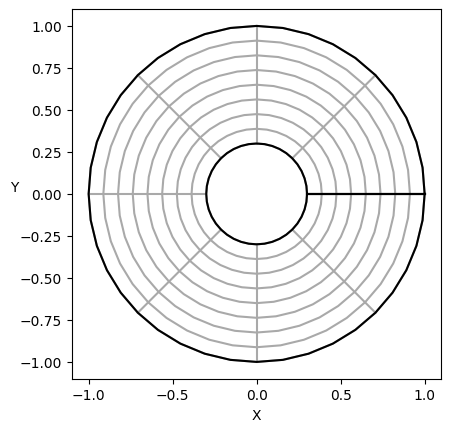

In [3]:


from sympde.topology.domain import Square, NCube, Domain
from sympde.topology.basic import BasicDomain
import numpy as np
from discrete import SplineMapping
from psydac.fem.splines      import SplineSpace
from psydac.fem.tensor       import TensorFemSpace
from psydac.ddm.cart         import DomainDecomposition
from mpi4py import MPI
from utils import plot_domain





# Creating the domain
bounds1=(0., 1.)
bounds2=(0., 2*np.pi)
logical_domain = Square('A_1', bounds1, bounds2)

# Defining parameters 
p1, p2 = 4,4
nc1, nc2 = 40,40
periodic1 = False
periodic2 = True

# Create 1D spline spaces along x1 and x2
V1 = SplineSpace( grid=np.linspace(*bounds1, num=nc1+1), degree=p1, periodic=periodic1 )
V2 = SplineSpace( grid=np.linspace(*bounds2, num=nc2+1), degree=p2, periodic=periodic2 )

# Create tensor-product 2D spline space, distributed
domain_decomposition = DomainDecomposition([nc1, nc2], [periodic1, periodic2], comm=MPI.COMM_WORLD)
tensor_space = TensorFemSpace(domain_decomposition, V1, V2)

# Create spline mapping by interpolating analytical one
mapping = SplineMapping.from_mapping(tensor_space, analytical_polar_mapping )
omega = analytical_polar_mapping(logical_domain)
plot_domain(omega,draw=False,isolines=True)

In [4]:
'''print("Unitary test for analytical_polar_mapping : \n")
unitary_test_Mapping_heritage(analytical_polar_mapping)
print("\n \n")

print("Unitary test for spline_polar_mapping1 : \n")
unitary_test_Mapping_heritage(spline_polar_mapping1)
print("\n \n")

print("Unitary test for spline_polar_mapping2 : \n")
unitary_test_Mapping_heritage(spline_polar_mapping2)
'''

'print("Unitary test for analytical_polar_mapping : \n")\nunitary_test_Mapping_heritage(analytical_polar_mapping)\nprint("\n \n")\n\nprint("Unitary test for spline_polar_mapping1 : \n")\nunitary_test_Mapping_heritage(spline_polar_mapping1)\nprint("\n \n")\n\nprint("Unitary test for spline_polar_mapping2 : \n")\nunitary_test_Mapping_heritage(spline_polar_mapping2)\n'

In [5]:
'''import numpy as np
import matplotlib.pyplot as plt

# Define the grid
x = np.linspace(0, 1, 50)
y = np.linspace(0,2*np.pi, 50)

# Create a meshgrid
X, Y = np.meshgrid(x, y)

# Initialize arrays to store the mapped points
U1, V1 = np.zeros_like(X), np.zeros_like(Y)
U2, V2 = np.zeros_like(X), np.zeros_like(Y)
U3, V3 = np.zeros_like(X), np.zeros_like(Y)

# Apply the mapping functions to the grid points
for i in range(50):
    for j in range(50):
        U1[i, j], V1[i, j] = analytical_polar_mapping(X[i, j], Y[i, j])
        U2[i, j], V2[i, j] = spline_polar_mapping1(X[i, j], Y[i, j])
        U3[i, j], V3[i, j] = spline_polar_mapping2(X[i, j], Y[i, j])
        
# Flatten the arrays for plotting
U1_flat, V1_flat = U1.flatten(), V1.flatten()
U2_flat, V2_flat = U2.flatten(), V2.flatten()   
U3_flat, V3_flat = U3.flatten(), V3.flatten()       

# Plot the results for map1
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.scatter(U1_flat, V1_flat, c='b', s=10)
plt.xlabel('U1')
plt.ylabel('V1')
plt.title('Mapped Domain using analytical polar mapping')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)

# Plot the results for map2
plt.subplot(1, 3, 2)
plt.scatter(U2_flat, V2_flat, c='r', s=10)
plt.xlabel('U2')
plt.ylabel('V2')
plt.title('Mapped Domain using first spline polar mapping')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)

# Plot the results for map2
plt.subplot(1, 3, 3)
plt.scatter(U3_flat, V3_flat, c='r', s=10)
plt.xlabel('U3')
plt.ylabel('V3')
plt.title('Mapped Domain using second spline polar mapping')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)

# Show the plots
plt.show()
'''

"import numpy as np\nimport matplotlib.pyplot as plt\n\n# Define the grid\nx = np.linspace(0, 1, 50)\ny = np.linspace(0,2*np.pi, 50)\n\n# Create a meshgrid\nX, Y = np.meshgrid(x, y)\n\n# Initialize arrays to store the mapped points\nU1, V1 = np.zeros_like(X), np.zeros_like(Y)\nU2, V2 = np.zeros_like(X), np.zeros_like(Y)\nU3, V3 = np.zeros_like(X), np.zeros_like(Y)\n\n# Apply the mapping functions to the grid points\nfor i in range(50):\n    for j in range(50):\n        U1[i, j], V1[i, j] = analytical_polar_mapping(X[i, j], Y[i, j])\n        U2[i, j], V2[i, j] = spline_polar_mapping1(X[i, j], Y[i, j])\n        U3[i, j], V3[i, j] = spline_polar_mapping2(X[i, j], Y[i, j])\n        \n# Flatten the arrays for plotting\nU1_flat, V1_flat = U1.flatten(), V1.flatten()\nU2_flat, V2_flat = U2.flatten(), V2.flatten()   \nU3_flat, V3_flat = U3.flatten(), V3.flatten()       \n\n# Plot the results for map1\nplt.figure(figsize=(14, 7))\n\nplt.subplot(1, 3, 1)\nplt.scatter(U1_flat, V1_flat, c='b', s=10

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from utils import plot_domain
from symbolic_mapping import AnalyticMapping

#Omega_1 = spline_polar_mapping(domain_log_1)


'''fig = plt.figure()
ax = fig.add_subplot(111)
domain = Omega_1
patch = domain.interior 
mapping = domain.mapping 
print(type(mapping))
draw = False 
Isolines = True 
refinement = 41 

linspace_0 = np.linspace(patch.min_coords[0], patch.max_coords[0], refinement, endpoint=True)
linspace_1 = np.linspace(patch.min_coords[1], patch.max_coords[1], refinement, endpoint=True)

mesh_grid = np.meshgrid(linspace_0, linspace_1, indexing='ij')
XX, YY = mapping(*mesh_grid)
ax.plot(XX[:, ::5], YY[:, ::5], color='darkgrey')
ax.plot(XX[::5, :].T, YY[::5, :].T, color='darkgrey')

X_00, Y_00 = mapping(linspace_0, np.full(refinement, linspace_1[0]))
X_01, Y_01 = mapping(linspace_0, np.full(refinement, linspace_1[-1]))
X_10, Y_10 = mapping(np.full(refinement, linspace_0[0]), linspace_1)
X_11, Y_11 = mapping(np.full(refinement, linspace_0[-1]), linspace_1)

ax.plot(X_00, Y_00, 'k')
ax.plot(X_01, Y_01, 'k')
ax.plot(X_10, Y_10, 'k')
ax.plot(X_11, Y_11, 'k')

ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('X')
ax.set_ylabel('Y', rotation='horizontal')'''


"fig = plt.figure()\nax = fig.add_subplot(111)\ndomain = Omega_1\npatch = domain.interior \nmapping = domain.mapping \nprint(type(mapping))\ndraw = False \nIsolines = True \nrefinement = 41 \n\nlinspace_0 = np.linspace(patch.min_coords[0], patch.max_coords[0], refinement, endpoint=True)\nlinspace_1 = np.linspace(patch.min_coords[1], patch.max_coords[1], refinement, endpoint=True)\n\nmesh_grid = np.meshgrid(linspace_0, linspace_1, indexing='ij')\nXX, YY = mapping(*mesh_grid)\nax.plot(XX[:, ::5], YY[:, ::5], color='darkgrey')\nax.plot(XX[::5, :].T, YY[::5, :].T, color='darkgrey')\n\nX_00, Y_00 = mapping(linspace_0, np.full(refinement, linspace_1[0]))\nX_01, Y_01 = mapping(linspace_0, np.full(refinement, linspace_1[-1]))\nX_10, Y_10 = mapping(np.full(refinement, linspace_0[0]), linspace_1)\nX_11, Y_11 = mapping(np.full(refinement, linspace_0[-1]), linspace_1)\n\nax.plot(X_00, Y_00, 'k')\nax.plot(X_01, Y_01, 'k')\nax.plot(X_10, Y_10, 'k')\nax.plot(X_11, Y_11, 'k')\n\nax.set_aspect('equal',